In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load your dataset
path = os.path.abspath(os.path.join("1","..", "..", "..", "data", "external",'spotify-2' ,"train.csv"))
df = pd.read_csv(path)

numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                     'valence', 'tempo']
for i, col in enumerate(numerical_columns, 1):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()
    
    file_path = os.path.join('figures', f'{i}_distribution_and_boxplot.png')
    plt.savefig(file_path)



In [ ]:
sns.pairplot(df, hue='track_genre', vars=numerical_columns)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load your dataset
path = os.path.abspath(os.path.join("1", "..", "..", "..", "data", "external", 'spotify-2', "train.csv"))
df = pd.read_csv(path)

# Encode 'track_genre' as numerical values
df['track_genre_encoded'], genre_encoder = pd.factorize(df['track_genre'])

# List of numerical columns (excluding 'track_genre' initially for distribution and boxplot)
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                     'valence', 'tempo']

# Create a 'figures' directory if it doesn't exist
figures_dir = os.path.join(os.path.dirname(path), 'figures')
os.makedirs(figures_dir, exist_ok=True)

# Plot and save histograms and boxplots for numerical columns
for i, col in enumerate(numerical_columns, 1):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    file_path = os.path.join(figures_dir, f'{i}_distribution_and_boxplot.png')
    plt.savefig(file_path)
    plt.close()  # Close the figure to avoid overlap in subsequent plots

# Add the encoded 'track_genre' to the numerical columns list for correlation analysis
numerical_columns.append('track_genre_encoded')

# Plot and save the correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
heatmap_file_path = os.path.join(figures_dir, 'correlation_heatmap.png')
plt.savefig(heatmap_file_path)
plt.close()  # Close the figure

# Show the plot (optional, can be removed if only saving)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load your dataset
path = os.path.abspath(os.path.join("1", "..", "..", "..", "data", "external", 'spotify-2', "train.csv"))
df = pd.read_csv(path)

def custom_label_encoder(series):
    unique_vals = series.unique()
    val_to_int = {val: idx for idx, val in enumerate(unique_vals)}
    encoded = series.map(val_to_int)
    return encoded, val_to_int

def label_encode_columns(df, columns):
    label_encoders = {}
    for col in columns:
        df[col], encoder = custom_label_encoder(df[col])
        label_encoders[col] = encoder
    return df, label_encoders

df, label_encoders = label_encode_columns(df, ['track_genre','artists'])

numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                     'valence', 'tempo','track_genre','artists']

for i, col in enumerate(numerical_columns, 1):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    file_path = os.path.join('figures', f'{i}_distribution_and_boxplot.png')
    plt.savefig(file_path)
    # plt.close() 

file_path = os.path.join('figures', f'{i}heatmap.png')

plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
heatmap_file_path = os.path.join(figures_dir, 'correlation_heatmap.png')
plt.savefig(heatmap_file_path)
plt.show()
plt.close() 

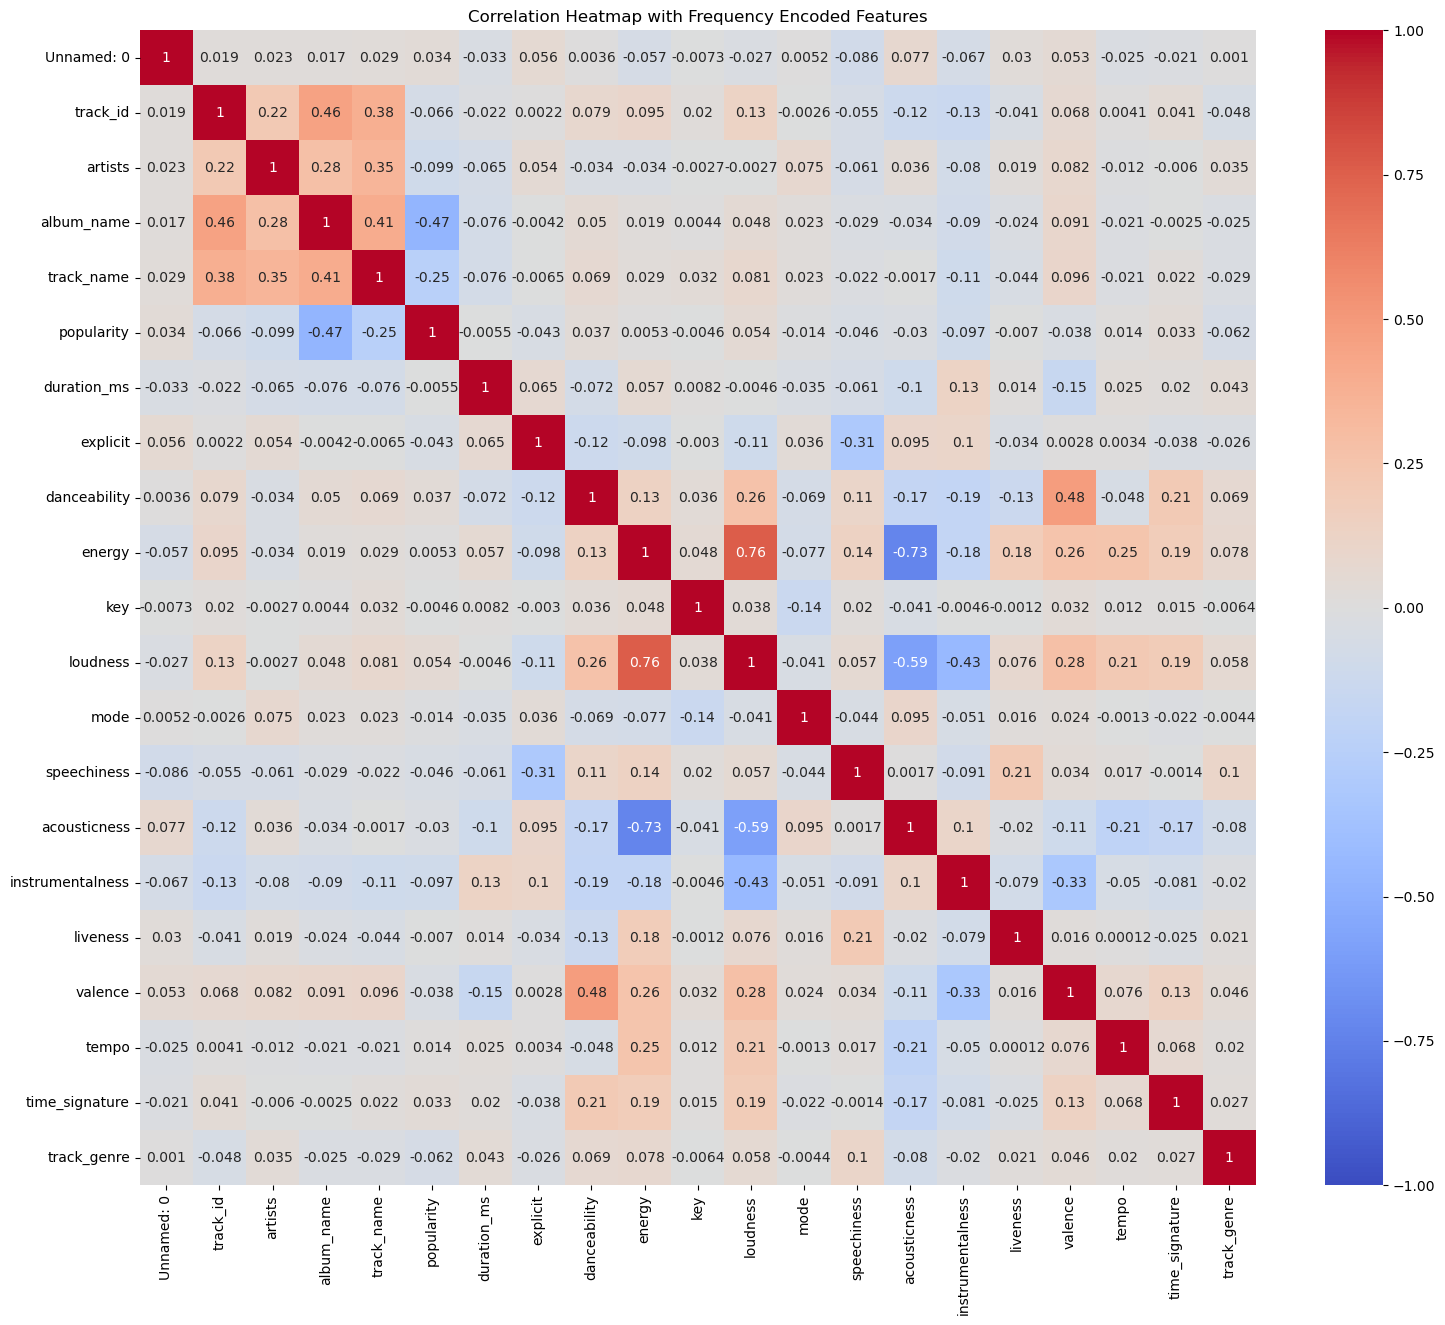

In [24]:
import pandas as pd
import os

# Load your dataset
path = os.path.abspath(os.path.join("1", "..", "..", "..", "data", "external", 'spotify-2', "train.csv"))
df = pd.read_csv(path)

categorical_columns = ['track_genre','artists','album_name','track_name','track_id','explicit']  

# Frequency encoding for categorical columns
for col in categorical_columns:
    freq_encoding = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_encoding)

# Compute correlations
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Frequency Encoded Features')
heatmap_file_path = os.path.join('figures', 'correlation_heatmap_freq_encoded.png')
plt.savefig(heatmap_file_path)
plt.show()



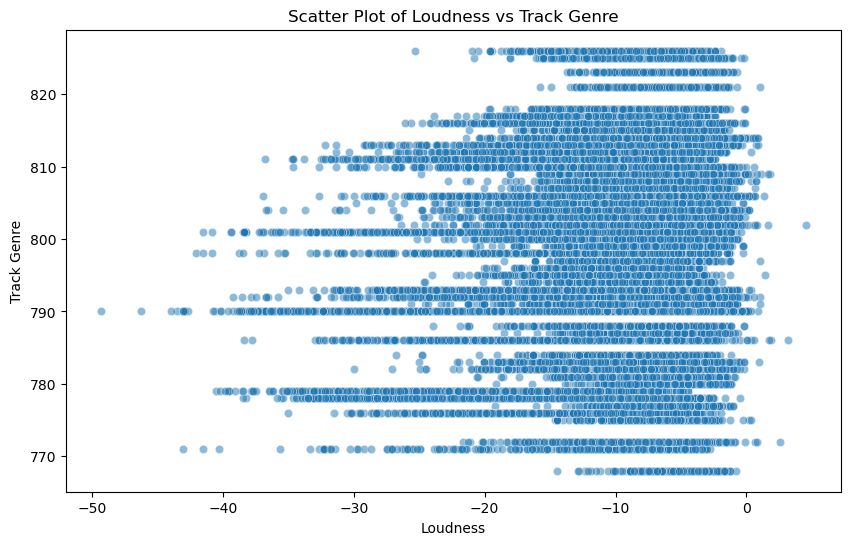